## Regression in PyTorch

In [1]:
import torch
import matplotlib.pyplot as plt

In [2]:
x = torch.tensor([0, 1, 2, 3, 4, 5, 6, 7.])
x

tensor([0., 1., 2., 3., 4., 5., 6., 7.])

In [3]:
# y = m * x + b
#Some random noise added
y = -0.5*x + 2 + torch.normal(mean = torch.zeros(8), std = 0.2)  

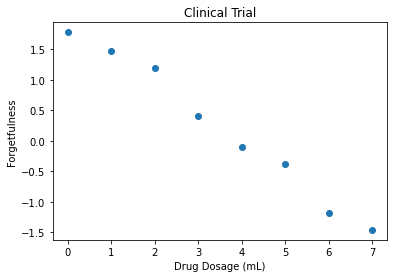

In [4]:
fig, ax = plt.subplots()
plt.title("Clinical Trial")
plt.xlabel('Drug Dosage (mL)')
plt.ylabel('Forgetfulness')
_ = ax.scatter(x, y)

In [5]:
m = torch.tensor([0.9]).requires_grad_()
print(m)

tensor([0.9000], requires_grad=True)


In [6]:
b = torch.tensor([0.1]).requires_grad_()
print(b)

tensor([0.1000], requires_grad=True)


### Simple Regression Function

In [7]:
#Define our regression function
def regression(my_x, my_m, my_b):
    return my_m * my_x + my_b

### Regression Plot Function

In [8]:
#Regression plot function
def regression_plot(my_x, my_y, my_m, my_b):
    fig, ax = plt.subplots()
    ax.scatter(my_x, my_y)
    x_min, x_max = ax.get_xlim()
    y_min = regression(x_min, my_m, my_b)
    y_max = regression(x_max, my_m, my_b)
    ax.set_xlim([x_min, x_max])
    _ = ax.plot([x_min, x_max], [y_min, y_max])

In [9]:
yhat = regression(x, m, b)
print(yhat)

tensor([0.1000, 1.0000, 1.9000, 2.8000, 3.7000, 4.6000, 5.5000, 6.4000],
       grad_fn=<AddBackward0>)


In [10]:
#Mean square error
def mse(my_yhat, my_y):
    sigma = torch.sum((my_yhat - my_y)**2)
    return sigma / len(my_y)

In [11]:
#Cost function
C = mse(yhat, y)
print(C)

tensor(19.3701, grad_fn=<DivBackward0>)


### Auto-diff to calculate gradient C

In [12]:
C.backward()

In [13]:
m.grad

tensor([35.8344])

In [14]:
b.grad

tensor([6.0670])

## Gradient Descent - PyTorch

In [15]:
optimizer = torch.optim.SGD([m, b], lr = 0.01)
optimizer.step()        #Take one step

In [16]:
print(str(m) + '\n' + str(b))

tensor([0.5417], requires_grad=True)
tensor([0.0393], requires_grad=True)


### Run 1000 epochs

In [17]:
epochs = 1000
for epoch in range(epochs):
    optimizer.zero_grad()       #Reset gradient to zero in each pass
    yhat = regression(x, m, b)
    C = mse(yhat, y)
    C.backward()
    optimizer.step()
    #print('Epoch {}, Cost {}, m grad {}, b grad {}'.format(epoch, '%.3g' % C.item(), 
    #                        '%.3g' % m.grad.item(), '%.3g' % b.grad.item()))

In [18]:
print(str(m) + '\n' + str(b))

tensor([-0.4892], requires_grad=True)
tensor([1.9269], requires_grad=True)


In [19]:
print(str(x) + '\n' + str(y))
print(str(type(x)) + '\n' + str(type(y)))

tensor([0., 1., 2., 3., 4., 5., 6., 7.])
tensor([ 1.7813,  1.4686,  1.1961,  0.4125, -0.1018, -0.3813, -1.1808, -1.4624])
<class 'torch.Tensor'>
<class 'torch.Tensor'>


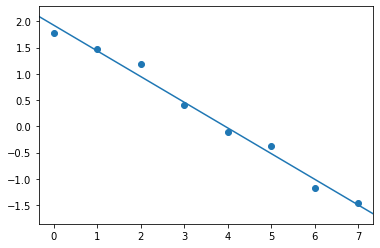

In [20]:
regression_plot(x, y, m.detach().numpy(), b.detach().numpy())

In [21]:
m.item()

-0.48920729756355286

In [22]:
b.item()

1.9269357919692993